In [9]:
from blimpy import Waterfall

obs = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', f_start = 1041, f_stop =1042 ).info()
data = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', 
                                                 f_start=1042.8099632263184, f_stop=1042.8106784820557, max_load=5).data

print(data.shape)


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1926.26953125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        322961408
            nifs :                                1
     source_name :                        Hip110750
         src_dej :                    -19:29:22.025
         src_raj :                     22:26:13.676
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-09-23T05:10:15.000
    tstart (MJD) :                57654.21545138889
        za_start :                              0.0

Num ints in file :                               16
      File shape :               (16, 1, 32

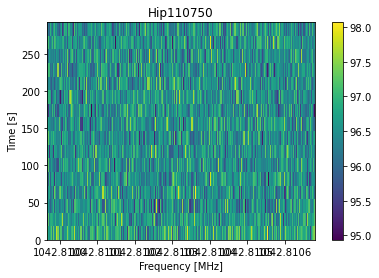

In [8]:
data = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', 
                    f_start=1042.8099632263184, f_stop=1042.8106784820557, 
                    max_load=5).plot_waterfall()


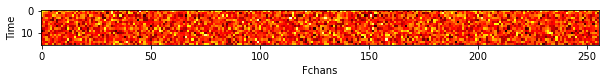

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow(data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()


In [17]:
import h5py
f = h5py.File('vae_best_model.hdf5', 'r')
print(list(f.keys()))
dset = f['encoder']
print(type(dset))
print(dset.name)

['decoder', 'encoder']
<class 'h5py._hl.group.Group'>
/encoder


In [15]:
import h5py
f = h5py.File('VAE-ENCODERv39.h5', 'r')
print(list(f.keys()))
type(f['model_weights'])

['model_weights']


h5py._hl.group.Group

In [209]:
from blimpy import Waterfall
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from random import random
%matplotlib inline

target_name = 'HIP53910'
df =pd.read_csv('../GBT_pipeline/result/'+target_name +'_directory.csv')
freq_frame = pd.read_csv('../GBT_pipeline/result/'+target_name +'.csv')
name = df['0'].tolist()
f_start_list = freq_frame['start_freq'].tolist()
f_end_list = freq_frame['end_freq'].tolist()
snr = freq_frame['SNR'].tolist()

data = []

30
1025.9835720062256
1025.9842872619631
2.178051233291626
1.5450822


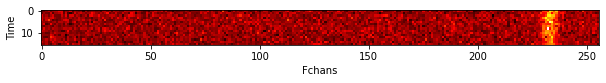

1.558411


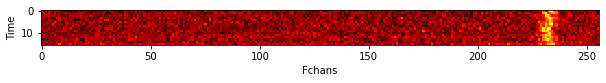

1.5992217


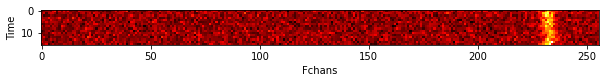

1.5934433


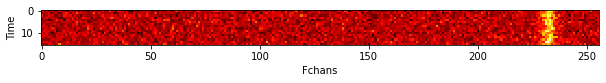

1.557467


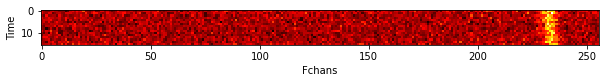

1.5350472


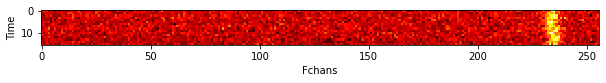

1308.3357810974119
1308.3364963531496
2.0221502780914307
1.2862791


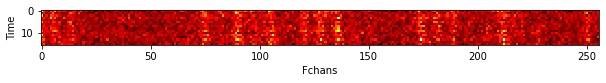

1.301105


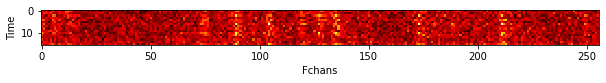

1.317777


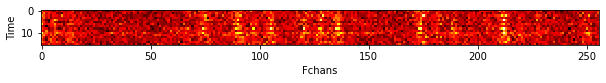

1.2197495


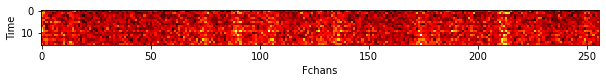

1.4260488


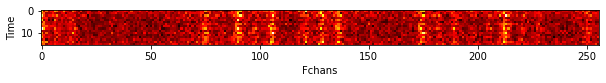

1.2458376


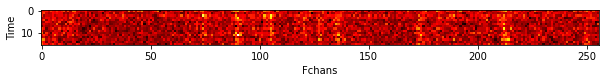

In [210]:
data = []
print(len(f_start_list))
for k in range(2):
    index= int(random()*len(f_start_list))
    f_start = f_start_list[index] 
    f_stop= f_end_list[index] 
    print(f_start)
    print(f_stop)
    print(snr[index])
    for i in range(6):
        dat = Waterfall(name[i], 
                              f_start=f_start, f_stop=f_stop).data
        temp = np.sum(dat[:,:,:], axis=0)
        print(temp[:,:].max()/np.mean(temp[:,:]))
        plt.figure(figsize=(10,4))
        plt.xlabel("Fchans")
        plt.ylabel("Time")
        plt.imshow(dat[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
        plt.show()

In [153]:
obs = Waterfall("../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5",f_stop = 1249.51171875, f_start =1023.92578125, max_load=20)

In [154]:
obs.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1926.26953125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        322961408
            nifs :                                1
     source_name :                        Hip110750
         src_dej :                    -19:29:22.025
         src_raj :                     22:26:13.676
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-09-23T05:10:15.000
    tstart (MJD) :                57654.21545138889
        za_start :                              0.0

Num ints in file :                               16
      File shape :               (16, 1, 32

(16, 1, 256)


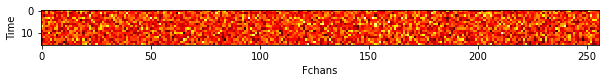

In [156]:
# n = int(80740352/256-10)
n= 10
data = obs.data[:,:,n*256 :(n+1)*256]
print(data.shape)
plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow(data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()

315392.0

In [160]:
WINDOW_SIZE = abs(256*-2.7939677238464355e-06)
print(1249.51171875 - (n+1)*WINDOW_SIZE)

1249.5038509368896


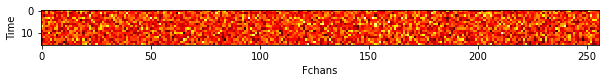

In [162]:
plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow( Waterfall("../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5",
                      f_start = 1249.5038509368896, f_stop= 1249.504566192627).data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()